# **Gradient Descent**

let,

f(x,y) = x^3 + y^3 + 3xy

as per GD:

(x1,y1) = (x0 y0) - alpha*f'(x0,y0)



*   We need to have a starting point (x0,y0)
*   A Gradient (first order derivative)
*   point of convergence, based on L2 norm of the new points obtained
*   updated points
*   path

# **Newton's Method**

as per NM:

(x1,y1) = (x0 y0) - f'(x0,y0)/f''(x0,y0)

*   We need to have a starting point (x0,y0)
*   A Gradient (first order derivative)
*   A Hessian matrix (second order derivative)
* Inverse of the Hessian
* Singularity
*   point of convergence, based on L2 norm of the new points obtained
*   updated points
*   path



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import symbols, diff
from sympy import lambdify

We will define the function and get its derivative and hessian

In [ ]:
x,y = symbols('x y')                                                             #Defining symbolic variables

f = (x**3 + y**3 + 3*x*y)                                                        #Defining the function

func = lambdify((x,y), f, 'numpy')                                               #creating a function of the original equation

grad1 = [diff(f,var) for var in (x,y)]                                           #Evaluating the Gradient (First Order Differentiation)
hessian = [[diff(grad, var) for var in (x,y)] for grad in grad1]                 #Evaluating the Hessian (Second Order Differentiation)

print(grad1)
print(hessian)

[3*x**2 + 3*y, 3*x + 3*y**2]
[[6*x, 3], [3, 6*y]]


Converting the gradient and Hessian into a function

In [ ]:
grad_func = lambdify((x,y), grad1, 'numpy')                                      #creating a function of the Gradient
hessian_func = lambdify((x,y), hessian, 'numpy')                                 #creating a function of the Hessian

Creating the Function to evaluate the **gradient descent.**

We would require- start point, the gradient, norm of the gradient

In [ ]:
# x[t+1] = x[t] - alpha*grad(t)

def gradient_descent(start, learning_rate=0.1, tolerance=1e-6, max_iterations=1000):
  point = start                                                                  #user input start (x,y) is saved into the variable "point"
  path = [point]                                                                 #for every iteration, the points generated will be stored in the list
  for i in range(max_iterations):
    grad_values = grad_func(point[0],point[1])                                   #calling the function of Gradient that was created and passing the values to it
    grad_norm = sum(g**2 for g in grad_values)**0.5                              #checking if the norm of the points derived from the gradient has an L2 norm < or > the tolerance
    if grad_norm < tolerance:
      print(f"Converged in {i + 1} iterations")                                  #when the L2 norm becomes less than the tolerance, we conclude that the function converges
      break

    point = [point[i] - learning_rate*grad_values[i] for i in range(len(point))] #evaluating the gradient
    path.append(point)                                                           #appending the point received in the list created "path"

  return point, path, i+1

In [ ]:
start_point = [2.0, 2.0]                                                         # Starting point
result, path, iterations = gradient_descent(start_point)                         # returning the final point of convergence, total number of iterations and the path (points evaluated per iteration)
print("Final Result:", result)
print("Total Iterations:", iterations)
#print("L2 Norm", norm)
print(path)
path = np.array(path)                                                            #storing the list into an array

Converged in 40 iterations
Final Result: [1.9986483777037717e-07, 1.9986483777037717e-07]
Total Iterations: 40
[[2.0, 2.0], [0.19999999999999996, 0.19999999999999996], [0.12799999999999997, 0.12799999999999997], [0.08468479999999998, 0.08468479999999998], [0.05712790539468798, 0.05712790539468798], [0.039010454503846256, 0.039010454503846256], [0.026850773484513382, 0.026850773484513382], [0.018579252228144372, 0.018579252228144372], [0.012901919975693957, 0.012901919975693957], [0.008981406121268007, 0.008981406121268007], [0.0062627845881130595, 0.0062627845881130595], [0.0043721824704400095, 0.0043721824704400095], [0.00305479293544156, 0.00305479293544156], [0.002135555526845565, 0.002135555526845565], [0.0014935206895694232, 0.0014935206895694232], [0.0010447953014835446, 0.0010447953014835446], [0.0007310292318718805, 0.0007310292318718805], [0.000511560141188961, 0.000511560141188961], [0.0003580135906988567, 0.0003580135906988567], [0.00025057106136986215, 0.0002505710613698621

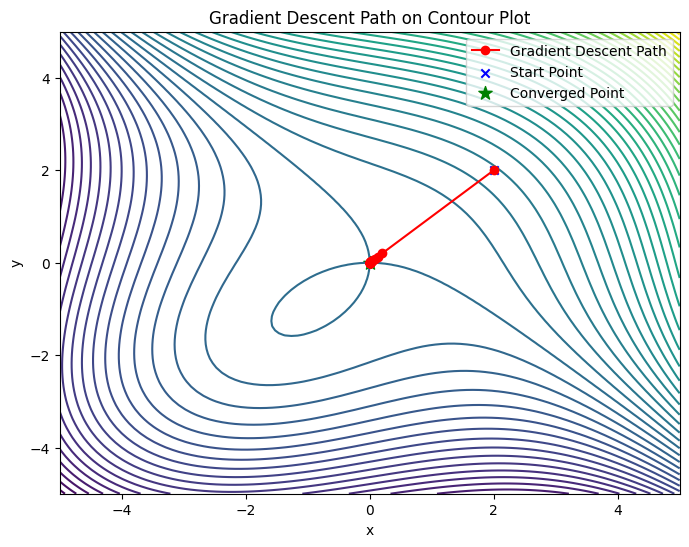

In [ ]:
#plot the above function and trace the path
x_values = np.linspace(-5, 5, 100)
y_values = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(x_values,y_values)
Z = func(X,Y)

plt.figure(figsize=(8, 6))

plt.contour(X, Y, Z, levels=50, cmap='viridis')                                               # Contour plot of the function
plt.plot(path[:, 0], path[:, 1], marker='o', color='red', label='Gradient Descent Path')      #Plotting the path of Gradient Descent
plt.scatter(start_point[0], start_point[1], color='blue', marker='x', label='Start Point')    #plotting the starting point
plt.scatter(result[0], result[1], color='green', marker='*', s=100, label='Converged Point')  #plotting the point of convergence

plt.title('Gradient Descent Path on Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# **Newton Method**

In [ ]:
def newton_method(start,tolerance=1e-6, max_iterations=100):
  point = start                                                                   #user input start (x,y) is saved into the variable "point"
  path = [point]                                                                  #for every iteration, the points generated will be stored in the list

  for i in range(max_iterations):
    grad_values = grad_func(point[0],point[1])                                    #calling the function of Gradient that was created and passing the values to it (f')
    hessian_values = hessian_func(point[0],point[1])                              #calling the function of Hessian that was created and passing the values to it (f")

    #Checking for the condition of Convergence
    grad_norm = sum(g**2 for g in grad_values)**0.5                               #checking if the norm of the points derived from the gradient has an L2 norm < or > the tolerance
    if grad_norm < tolerance:
      print(f"Converged in {i + 1} iterations")                                   #when the L2 norm becomes less than the tolerance, we conclude that the function converges
      break

    #Evaluating through Newton's method
    try:
      hessian_inv = np.linalg.inv(hessian_values)                                  #evaluating the inverse of the hessian
      delta_x = -hessian_inv @ grad_values                                         #evaluating the (negative of f'(x,y)/f''(x,y))
    except:
      print("Hessian is singular; stopping optimization.")
      break

    #Updating the point
    point = [point[i] + delta_x[i] for i in range(len(point))]                    #evaluating the gradient
    path.append(point)                                                            #appending the point received in the list created "path"

  return point, path, i+1

In [ ]:
start_point_newton = [2.0, 2.0]                                                   # Starting point
result_newton, path_newton, iterations_newton = newton_method(start_point)        # returning the final point of convergence, total number of iterations and the path (points evaluated per iteration)
print("Final Result (Newton's Method):", result_newton)
print("Total Iterations:", iterations_newton)
#print("L2 Norm", grad_norm)
path_newton = np.array(path_newton)                                               #Storing the List into Array

Converged in 7 iterations
Final Result (Newton's Method): [5.372289656897496e-12, 5.372289656897496e-12]
Total Iterations: 7


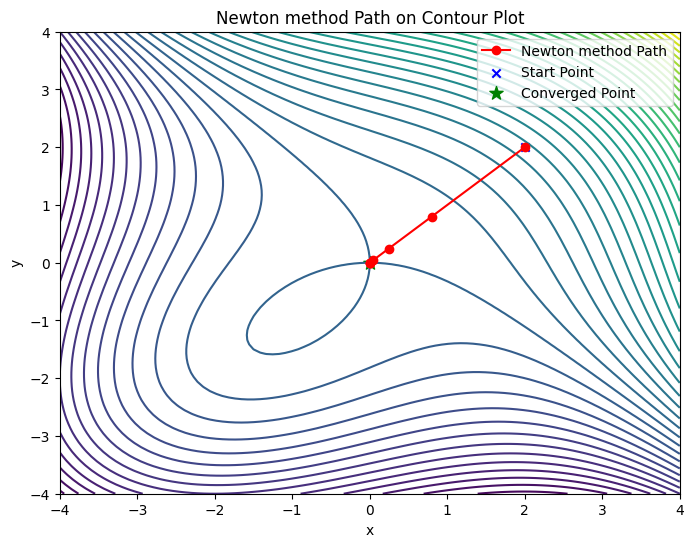

In [ ]:
#plot the above function and trace the path
x_values = np.linspace(-4, 4, 100)
y_values = np.linspace(-4, 4, 100)
X,Y = np.meshgrid(x_values,y_values)
Z = func(X,Y)

plt.figure(figsize=(8, 6))


plt.contour(X, Y, Z, levels=50, cmap='viridis')                                                               # Contour plot of the function
plt.plot(path_newton[:, 0], path_newton[:, 1], marker='o', color='red', label='Newton method Path')           # Plotting the path of Newton's Method
plt.scatter(start_point_newton[0], start_point_newton[1], color='blue', marker='x', label='Start Point')      # Plotting the Starting point
plt.scatter(result_newton[0], result_newton[1], color='green', marker='*', s=100, label='Converged Point')    # Plotting the ppoint of Convergence.


plt.title('Newton method Path on Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# **Result**

In [ ]:
print(
    f"The number of iterations done by Gradient Descent are {iterations} iterations "
    f"while for Newton Descent it is {iterations_newton} iterations. "
    f"{'Newton Method has lesser iterations than Gradient Descent' if iterations_newton < iterations else 'Gradient Descent has lesser iterations than Newton Method'}"
    f" by {((iterations_newton - iterations)/iterations)*100} %."
)
print()
print(f"The point of convergence by Newton's method is {result_newton} while that obtained by Gradient Descent is {result}.")
print()
print("Newton's method converged so well than Gradient Descent because the Derivative is guided by the Hessian Matrix (Curvature)")

The number of iterations done by Gradient Descent are 40 iterations while for Newton Descent it is 7 iterations. Newton Method has lesser iterations than Gradient Descent by -82.5 %.

The point of convergence by Newton's method is [5.372289656897496e-12, 5.372289656897496e-12] while that obtained by Gradient Descent is [1.9986483777037717e-07, 1.9986483777037717e-07].
